In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [152]:
df = pd.read_csv(r'C:\Users\F5184053\OneDrive - FRG\Personal\Explore AI\08. Intergrated Project/CAKE ORDERS Data.csv').dropna()

In [153]:
df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost
0,Birthday - 1,15cm,Square,Princess,Fondant,Vanilla,Pink,Baby Elephant,200.0,2023/01/26,103.0
1,Birthday - 1,15cm,Round,None,Fondant,Chocolate,Nude,Happy Birthday,200.0,2023/08/31,118.0
2,Birthday - 1,15cm,Round,Princess,Fondant,Chocolate,Pink,Happy 1st Birthday,200.0,2023/09/17,118.0
3,Birthday - 1,15cm,Round,Princess,Fondant,Lemon,Pink,Happy 1st Birthday,200.0,2023/09/30,142.0
4,Birthday - 1,2 step,1 Square 1 Round,None,Fondant,Chocolate,Blue,One,600.0,2023/03/15,450.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OCCASION         83 non-null     object 
 1   SIZE             83 non-null     object 
 2   Type             83 non-null     object 
 3   Theme            83 non-null     object 
 4   Icing            83 non-null     object 
 5   Flavour          83 non-null     object 
 6   Colour           83 non-null     object 
 7   Topping          83 non-null     object 
 8   PRICE            83 non-null     float64
 9   Collection Date  83 non-null     object 
 10  Cost             83 non-null     float64
dtypes: float64(2), object(9)
memory usage: 7.3+ KB


# **The OCCASION COLUMN**

In [155]:
print(df['OCCASION'].unique())

['Birthday - 1' 'Baby Shower' 'Bridal Shower' 'Birthday - 32'
 'Birthday - 5' 'Birthday - 3' 'Birthday - 2' 'Birthday - 40'
 'Birthday - 35' 'Birthday - 28' 'Birthday - 12' 'Birthday - 9'
 'Birthday - 10' 'Birthday - 4' 'Birthday - 8' 'Birthday - 25'
 'Birthday - 30' 'Graduation' 'Birthday - 21' 'Birthday - 33'
 'Birthday - 16' 'Birthday - 50' 'Birthday - 13' 'Birthday - 80'
 'House Warming' 'Wedding']


**The occations column can be cleaned up a bit by only having the occations and creating a new column for the ages**


In [156]:
df[['OCCASION','YEAR CELEBRATING']] = df['OCCASION'].str.split('-',2,expand = True)

df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING
0,Birthday,15cm,Square,Princess,Fondant,Vanilla,Pink,Baby Elephant,200.0,2023/01/26,103.0,1
1,Birthday,15cm,Round,None,Fondant,Chocolate,Nude,Happy Birthday,200.0,2023/08/31,118.0,1
2,Birthday,15cm,Round,Princess,Fondant,Chocolate,Pink,Happy 1st Birthday,200.0,2023/09/17,118.0,1
3,Birthday,15cm,Round,Princess,Fondant,Lemon,Pink,Happy 1st Birthday,200.0,2023/09/30,142.0,1
4,Birthday,2 step,1 Square 1 Round,None,Fondant,Chocolate,Blue,One,600.0,2023/03/15,450.0,1


In [157]:
print(df['OCCASION'].unique())

['Birthday ' 'Baby Shower' 'Bridal Shower' 'Graduation' 'House Warming'
 'Wedding']


# **The Size Column**

In [158]:
print(df['SIZE'].unique())

['15cm' '2 step' '20 cm' '20cm' '25cm' '30 cm' '30cm' '25 cm' '2steps'
 '3 step' '3steps' '50cm' 'Bunch' '5step']


**A few inconsistancies in the sizes:**
   **1 - different measurements
   2 - different spellings for the same word
   3 - spaces after the numbers**

In [159]:
df['SIZE'] = df['SIZE'].str.replace(' ','')
df['SIZE'] = df['SIZE'].str.replace('steps','step')

df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING
0,Birthday,15cm,Square,Princess,Fondant,Vanilla,Pink,Baby Elephant,200.0,2023/01/26,103.0,1
1,Birthday,15cm,Round,None,Fondant,Chocolate,Nude,Happy Birthday,200.0,2023/08/31,118.0,1
2,Birthday,15cm,Round,Princess,Fondant,Chocolate,Pink,Happy 1st Birthday,200.0,2023/09/17,118.0,1
3,Birthday,15cm,Round,Princess,Fondant,Lemon,Pink,Happy 1st Birthday,200.0,2023/09/30,142.0,1
4,Birthday,2step,1 Square 1 Round,None,Fondant,Chocolate,Blue,One,600.0,2023/03/15,450.0,1


In [160]:
print(df['SIZE'].unique())

['15cm' '2step' '20cm' '25cm' '30cm' '3step' '50cm' 'Bunch' '5step']


# The Type Column

In [161]:
print(df['Type'].unique())

['Square' 'Round' '1 Square 1 Round' 'character' '1 Square 2 Round'
 'Bunch']


# **The Icing Column**

In [162]:
print(df['Icing'].unique())

['Fondant' 'Naked' 'Buttercream']


# **The Flavour Column**

In [163]:
print(df['Flavour'].unique())

['Vanilla' 'Chocolate' 'Lemon' 'Red Velvet' 'Carrot'
 '1 Vanilla 1 Chocolate' '1 Red Velvet 1 Carrot 1 Lemon' 'Lemon Carrot'
 '2Lemon 2 Carrot 1 Vanilla' '2 Lemon 3 Vanilla'
 '2Red velvet 2 Carrot 1 Vanilla' '2Chocolate 1 Red Velvet 2 Carrot']


**Removing digits from the flavours to form one flavour and making them one word**

In [164]:
df['Flavour'] = df['Flavour'].str.replace('\d+','')
df['Flavour'] = df['Flavour'].str.lower()

df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING
0,Birthday,15cm,Square,Princess,Fondant,vanilla,Pink,Baby Elephant,200.0,2023/01/26,103.0,1
1,Birthday,15cm,Round,None,Fondant,chocolate,Nude,Happy Birthday,200.0,2023/08/31,118.0,1
2,Birthday,15cm,Round,Princess,Fondant,chocolate,Pink,Happy 1st Birthday,200.0,2023/09/17,118.0,1
3,Birthday,15cm,Round,Princess,Fondant,lemon,Pink,Happy 1st Birthday,200.0,2023/09/30,142.0,1
4,Birthday,2step,1 Square 1 Round,None,Fondant,chocolate,Blue,One,600.0,2023/03/15,450.0,1


In [165]:
print(df['Flavour'].unique())

['vanilla' 'chocolate' 'lemon' 'red velvet' 'carrot' ' vanilla  chocolate'
 ' red velvet  carrot  lemon' 'lemon carrot' 'lemon  carrot  vanilla'
 ' lemon  vanilla' 'red velvet  carrot  vanilla'
 'chocolate  red velvet  carrot']


**Making the red velvet flavour one word. Also good for visualising later**

**Creating a new column as a count of flavours**

In [166]:
df['Flavour'] = df['Flavour'].str.replace('red velvet', 'red-velvet')


df['Total Flavours'] = df['Flavour'].str.split().apply(len)


In [167]:
df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING,Total Flavours
0,Birthday,15cm,Square,Princess,Fondant,vanilla,Pink,Baby Elephant,200.0,2023/01/26,103.0,1,1
1,Birthday,15cm,Round,None,Fondant,chocolate,Nude,Happy Birthday,200.0,2023/08/31,118.0,1,1
2,Birthday,15cm,Round,Princess,Fondant,chocolate,Pink,Happy 1st Birthday,200.0,2023/09/17,118.0,1,1
3,Birthday,15cm,Round,Princess,Fondant,lemon,Pink,Happy 1st Birthday,200.0,2023/09/30,142.0,1,1
4,Birthday,2step,1 Square 1 Round,None,Fondant,chocolate,Blue,One,600.0,2023/03/15,450.0,1,1


In [168]:
print(df['Total Flavours'].unique())

[1 2 3]


**Making the flavours to always appear in a certain order to create 'one flavour' even for more than one flavor cakes**

In [169]:
desired_order = ['vanilla','chocolate','red-velvet','carrot','lemon']

def custom_order(text):
    words = text.split()
    sorted_w = sorted(words,key = lambda x: desired_order.index(x) if x in desired_order else float('inf'))
    return ' '.join(sorted_w)

df['Flavour'] = df['Flavour'].apply(custom_order)

In [170]:
result = df[df['Total Flavours']==3].head()
print(result)

     OCCASION   SIZE   Type Theme        Icing                      Flavour  \
57  Birthday   3step  Round  None  Buttercream      red-velvet carrot lemon   
76    Wedding  5step  Round  None      Fondant         vanilla carrot lemon   
80    Wedding  5step  Round  None      Fondant    vanilla red-velvet carrot   
82    Wedding  5step  Round  None      Fondant  chocolate red-velvet carrot   

   Colour         Topping   PRICE Collection Date    Cost YEAR CELEBRATING  \
57   Nude  Happy Birthday   700.0      2023/03/16   588.0               50   
76  White          Couple  2000.0      2023/04/08  1004.0             None   
80  White          Couple  2000.0      2023/09/24  1379.0             None   
82  White          Couple  2000.0      2023/12/30  1413.0             None   

    Total Flavours  
57               3  
76               3  
80               3  
82               3  


In [171]:
print(df['Flavour'].unique())
df.head()

['vanilla' 'chocolate' 'lemon' 'red-velvet' 'carrot' 'vanilla chocolate'
 'red-velvet carrot lemon' 'carrot lemon' 'vanilla carrot lemon'
 'vanilla lemon' 'vanilla red-velvet carrot' 'chocolate red-velvet carrot']


,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING,Total Flavours
0,Birthday,15cm,Square,Princess,Fondant,vanilla,Pink,Baby Elephant,200.0,2023/01/26,103.0,1,1
1,Birthday,15cm,Round,None,Fondant,chocolate,Nude,Happy Birthday,200.0,2023/08/31,118.0,1,1
2,Birthday,15cm,Round,Princess,Fondant,chocolate,Pink,Happy 1st Birthday,200.0,2023/09/17,118.0,1,1
3,Birthday,15cm,Round,Princess,Fondant,lemon,Pink,Happy 1st Birthday,200.0,2023/09/30,142.0,1,1
4,Birthday,2step,1 Square 1 Round,None,Fondant,chocolate,Blue,One,600.0,2023/03/15,450.0,1,1


# **The Colour Column**

In [172]:
print(df['Colour'].unique())

['Pink' 'Nude' 'Blue' 'Red' 'Purple' 'Yellow' 'Black' 'Gold' 'White'
 'Green' 'Brown']


# **The Topping Column**

In [173]:
print(df['Topping'].unique())

['Baby Elephant' 'Happy Birthday' 'Happy 1st Birthday' 'One' 'Piglet'
 'Mickey Mouse' 'Rainbow' 'Baby Shoes' 'Tummy' 'Oh Baby' 'Baby Feet'
 'Congratulations' 'Books' 'Pencils' 'Hat' 'None' 'Couple']


# **The Price Column**

In [174]:
df.PRICE.describe()

count      83.000000
mean      478.915663
std       479.654378
min       200.000000
25%       250.000000
50%       300.000000
75%       350.000000
max      2000.000000
Name: PRICE, dtype: float64

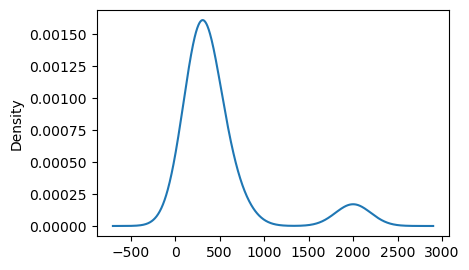

In [175]:
df['PRICE'].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

# **The Collection Date Column**

In [176]:
df['Collection Date'] = pd.to_datetime(df['Collection Date'])
df['Month'] = df['Collection Date'].dt.month_name()

In [177]:
df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING,Total Flavours,Month
0,Birthday,15cm,Square,Princess,Fondant,vanilla,Pink,Baby Elephant,200.0,2023-01-26,103.0,1,1,January
1,Birthday,15cm,Round,None,Fondant,chocolate,Nude,Happy Birthday,200.0,2023-08-31,118.0,1,1,August
2,Birthday,15cm,Round,Princess,Fondant,chocolate,Pink,Happy 1st Birthday,200.0,2023-09-17,118.0,1,1,September
3,Birthday,15cm,Round,Princess,Fondant,lemon,Pink,Happy 1st Birthday,200.0,2023-09-30,142.0,1,1,September
4,Birthday,2step,1 Square 1 Round,None,Fondant,chocolate,Blue,One,600.0,2023-03-15,450.0,1,1,March


# **Cost Column**

In [178]:
df.Cost.describe()

count      83.000000
mean      343.120482
std       316.938880
min       103.000000
25%       183.000000
50%       235.000000
75%       296.500000
max      1484.000000
Name: Cost, dtype: float64

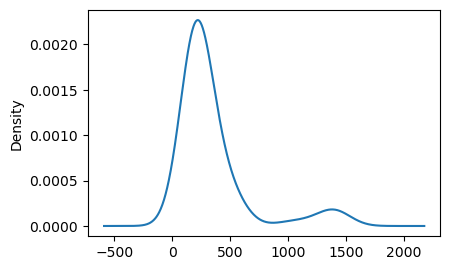

In [179]:
df['Cost'].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

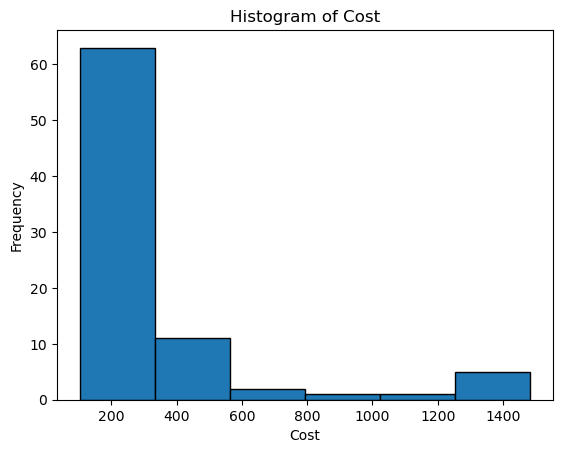

In [180]:

column_name = 'Cost'


plt.hist(df[column_name], bins=6, edgecolor='black')


plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')


plt.show()

In [181]:
bin_edges = [0, 150, 300, 450,600,750,900,2000] 
bin_labels = ['0-150', '150-300', '300-450','450-600','600-750','750-900','>900'] 

df['Cost Range'] = pd.cut(df['Cost'], bins=bin_edges, labels=bin_labels)

In [182]:
df.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING,Total Flavours,Month,Cost Range
0,Birthday,15cm,Square,Princess,Fondant,vanilla,Pink,Baby Elephant,200.0,2023-01-26,103.0,1,1,January,0-150
1,Birthday,15cm,Round,None,Fondant,chocolate,Nude,Happy Birthday,200.0,2023-08-31,118.0,1,1,August,0-150
2,Birthday,15cm,Round,Princess,Fondant,chocolate,Pink,Happy 1st Birthday,200.0,2023-09-17,118.0,1,1,September,0-150
3,Birthday,15cm,Round,Princess,Fondant,lemon,Pink,Happy 1st Birthday,200.0,2023-09-30,142.0,1,1,September,0-150
4,Birthday,2step,1 Square 1 Round,None,Fondant,chocolate,Blue,One,600.0,2023-03-15,450.0,1,1,March,300-450


In [183]:
df_new = df

In [184]:
df_new.head()

,OCCASION,SIZE,Type,Theme,Icing,Flavour,Colour,Topping,PRICE,Collection Date,Cost,YEAR CELEBRATING,Total Flavours,Month,Cost Range
0,Birthday,15cm,Square,Princess,Fondant,vanilla,Pink,Baby Elephant,200.0,2023-01-26,103.0,1,1,January,0-150
1,Birthday,15cm,Round,None,Fondant,chocolate,Nude,Happy Birthday,200.0,2023-08-31,118.0,1,1,August,0-150
2,Birthday,15cm,Round,Princess,Fondant,chocolate,Pink,Happy 1st Birthday,200.0,2023-09-17,118.0,1,1,September,0-150
3,Birthday,15cm,Round,Princess,Fondant,lemon,Pink,Happy 1st Birthday,200.0,2023-09-30,142.0,1,1,September,0-150
4,Birthday,2step,1 Square 1 Round,None,Fondant,chocolate,Blue,One,600.0,2023-03-15,450.0,1,1,March,300-450


In [185]:
df_new.to_csv('Advanced Baking Data.csv')